
# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras and a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. 

### Objective

- Build a baseline classification model then, run a few experiments with different optimizers and learning rates. 
- Don't forget to [**switch to GPU if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [ ]:
# imports in first cell 
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

Note that the 28x28 quickdraw images have already been "flattened" into 784: dimensional vectors

In [ ]:
# load the quickdraw data set
!git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks
data = np.load('/content/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

Cloning into 'DS-Unit-4-Sprint-2-Neural-Networks'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 513 (delta 76), reused 124 (delta 66), pack-reused 365
Receiving objects: 100% (513/513), 83.34 MiB | 7.48 MiB/s, done.
Resolving deltas: 100% (260/260), done.
(100000, 784)
(100000,)


These are the names of the 10 image classes

In [ ]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

We can explore the data a bit by reshaping the vectors back to images and displaying them with their labels. <br>
Turns out the data has 10 blocks of 10,000 images of each of the above labels, in order. <br>
So the code below displays the first image of each class.

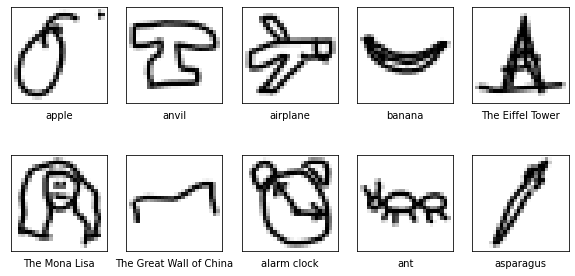

In [ ]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1) # num+1 specifies the position of the current subplot in the figure.
    plt.xticks([]) # remove the tick marks on both the x-axis 
    plt.yticks([]) # and y-axis of the plot.
    plt.grid(False) # remove the grid lines 
    plt.imshow(X[start].reshape(28,28),cmap=plt.cm.binary) # show img by getting the img data and reshaping it to a 28x28 pixel array, display img in black and white
    plt.xlabel(name) # add name of the class for each img
    start += 10000
plt.show()

Say hello to the Quickdraw dataset!

You'll be using this dataset a lot this week as an alternative to the MNIST digits data set, which we'll use in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, its various components, and gradually come to a better understanding of how to build neural networks without worrying about cleaning and prepping our image data much.

In [ ]:
# always a good idea to shuffle your dataset!
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1 
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20 
- **Use** the `validation_split` keyword in `model.fit()` to automatically create a training / validation dataset from within the model. Specify a percentage, such as `validation_split = 0.2`
 
Not sure what the various parameters are for or what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates 

In [ ]:
# Row vector
X[0].shape

(784,)

In [ ]:
# Flattened image
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  31, 106,  60,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4, 148, 252, 255, 247,
         4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 176, 254, 138,
        33,  43,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 188, 251,
        96,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113,
       255,  88,   0,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  88, 209, 238, 231, 18

In [ ]:
# get dim of image row vectors and save to input_dim

# get number of unique labels and save to n_output_labels

# normalize image data to values between 0 and 1 (by dividing by max pixel value)


# YOUR CODE HERE
# Dimension of image row vector 
input_dim = X.shape[1]
# Number of unique labels
n_output_labels = len(np.unique(y))

# Normalize image data to values between 0 and 1
max_value=X.max()
X_scaled = X/max_value


# raise NotImplementedError()

In [ ]:
# a check on your data prep 
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [ ]:
# instantiate a sequential object and call it model, then add the layers to your model

# add a compile layer but don't fit your model yet 

# YOUR CODE HERE

# Number of epochs
epochs=20

# Instantiate the Sequential class
model = Sequential()

# Hidden layer 1
model.add(Dense(500, activation='sigmoid', input_dim=input_dim)) # the 1st layer needs an implicit declaration of the input layer
# Hidden layer 2
model.add(Dense(250, activation='sigmoid'))
# Hidden layer 3
model.add(Dense(100, activation='sigmoid'))
# Output layer
model.add(Dense(n_output_labels, activation='softmax')) # softmax values can be interpreted as the probability of each class given the input data

model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# raise NotImplementedError()

In [ ]:
# a check on your model architecture 
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [ ]:
# check out your model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit your model and save training results to history 
history = model.fit(X_scaled, y, # passed scaled data
                    epochs=epochs, 
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 23s 9ms/step - loss: 2.2936 - accuracy: 0.1323 - val_loss: 2.2762 - val_accuracy: 0.2254
Epoch 2/20
2500/2500 [==============================] - 25s 10ms/step - loss: 2.2364 - accuracy: 0.2687 - val_loss: 2.1642 - val_accuracy: 0.3399
Epoch 3/20
2500/2500 [==============================] - 26s 10ms/step - loss: 1.9454 - accuracy: 0.4236 - val_loss: 1.7238 - val_accuracy: 0.4121
Epoch 4/20
2500/2500 [==============================] - 23s 9ms/step - loss: 1.5769 - accuracy: 0.5217 - val_loss: 1.4708 - val_accuracy: 0.5473
Epoch 5/20
2500/2500 [==============================] - 25s 10ms/step - loss: 1.3649 - accuracy: 0.5968 - val_loss: 1.2673 - val_accuracy: 0.6314
Epoch 6/20
2500/2500 [==============================] - 26s 10ms/step - loss: 1.1689 - accuracy: 0.6564 - val_loss: 1.0988 - val_accuracy: 0.6743
Epoch 7/20
2500/2500 [==============================] - 22s 9ms/step - loss: 1.0427 - accuracy: 0.6867 - val_loss: 1.0200 - va

----
### Visualize the Results

- Move results in `history` to a dataframe. 
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create line plots for both loss and accuracy by epoch. 
- Analyze the results and write a couple of observations. 

At what point should we have stopped training the model and why? 

In [ ]:
df = pd.DataFrame.from_records(history.history)
n_rows= df.shape[0]
# Shift the index up by one for plotting epochs
df.index = [i for i in range(1, n_rows+1)]

In [ ]:
df.head()

,accuracy,loss,val_accuracy,val_loss
1,0.132262,2.293586,0.22535,2.276233
2,0.268737,2.236372,0.33985,2.164247
3,0.423575,1.945413,0.41215,1.723789
4,0.521688,1.576896,0.54735,1.470763
5,0.596775,1.364857,0.63140,1.267288


In [ ]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

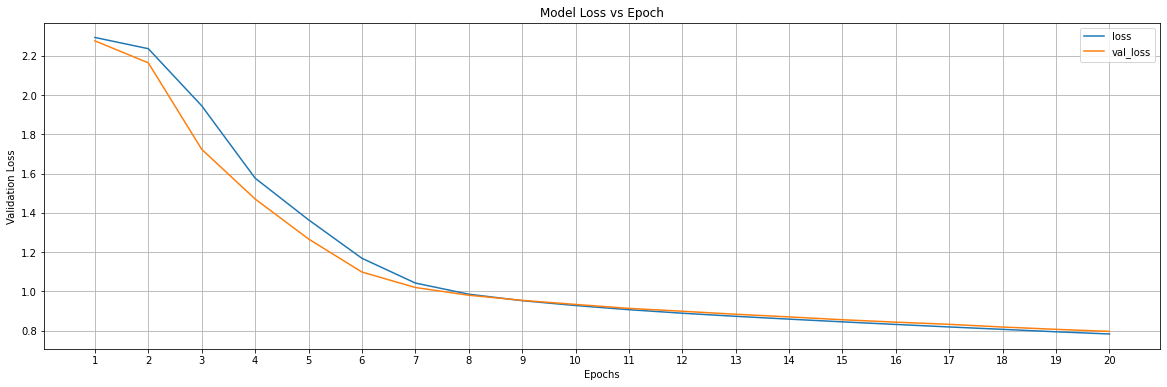

In [ ]:
# use seaborn to plot loss and accuracy metrics

# YOUR CODE HERE
plot_cols = ['loss', 'val_loss']
df[plot_cols].plot(figsize=(20,6), grid=True);
plt.title('Model Loss vs Epoch');
plt.xlabel('Epochs');
plt.ylabel('Validation Loss');
plt.xticks(df.index);

# raise NotImplementedError()

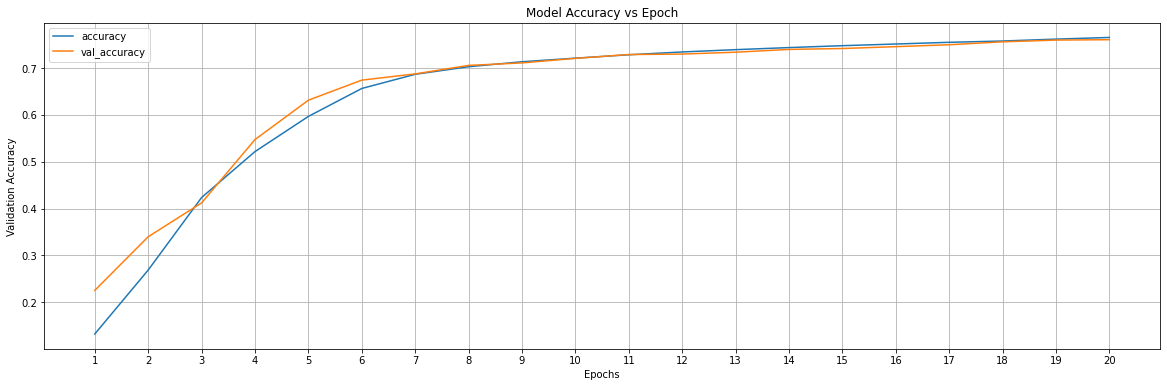

In [ ]:
plot_cols = ['accuracy', 'val_accuracy']
df[plot_cols].plot(figsize=(20,6), grid=True);
plt.title('Model Accuracy vs Epoch');
plt.xlabel('Epochs');
plt.ylabel('Validation Accuracy');
plt.xticks(df.index);

### Observations 

Based on the plot of the training and validation loss, answer the following questions. 

**Was our model able to learn throughout the 20 epochs? Why or why not?**

YOUR ANSWER HERE

Yes, the model was able to learn throughout the 20 epochs, as both training and validation loss decreased from about 2.3 during the first epoch down to about 0.8 in the last epoch. Also, the training accuracy increased for both training and validation sets reaching about 76%.  


**Is our model overfitting? Why or why not?**

YOUR ANSWER HERE

No, the model is not overfitting. The gap or difference between the training and validation curves for accuracy and loss is very narrow. There is a bigger gap in the initial epochs but after epoch 10 there is essentially no gap. These are signs that the model is generalizing well on new or unseen data.

**Could the model score benefit from additional epochs? Why or why not?**

YOUR ANSWER HERE

Not really. Look at the derivative (the rate of change) near the end of the training. We see that the curve is almost flat, which means that introducing more epochs would not decrease the loss by any significant amount. If we want to further decrease the loss of our model, we will have to explore other options such as using a different activation function or optimizer.


-----
## Change Optimizers

Let's compare model performance between different optimizers. 
- Build a new model, identical to the last one but using `adam` for the optimizer. 
- Train (fit) the model
- Save the modeling results to adam_history, so we don't erase the results from the previous model run
- Visualize the training results just as we did for the last model. 


In [ ]:
# train the same model as above but use the sgd optimizer if you used adam previously (or use adam if you used sgd previously)

# YOUR CODE HERE
# Number of epochs
epochs = 20
# Instantiate the model
model = Sequential()

# Hidden layer 1
model.add(Dense(500, activation='sigmoid', input_dim=input_dim))
# Hidden layer 2
model.add(Dense(250, activation='sigmoid'))
# Hidden layer 3
model.add(Dense(100, activation='sigmoid'))
# Output layer
model.add(Dense(n_output_labels, activation='softmax')) # softmax values can be interpreted as the probability of each class given the input data

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit your model and save training results to adam_history 
adam_history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # a held-out validation set will be generated within the model
                    validation_split=0.2
                   )


# raise NotImplementedError()

Epoch 1/20
2500/2500 [==============================] - 32s 12ms/step - loss: 0.7458 - accuracy: 0.7688 - val_loss: 0.5838 - val_accuracy: 0.8227
Epoch 2/20
2500/2500 [==============================] - 31s 13ms/step - loss: 0.4952 - accuracy: 0.8496 - val_loss: 0.4671 - val_accuracy: 0.8590
Epoch 3/20
2500/2500 [==============================] - 32s 13ms/step - loss: 0.4116 - accuracy: 0.8748 - val_loss: 0.4312 - val_accuracy: 0.8701
Epoch 4/20
2500/2500 [==============================] - 30s 12ms/step - loss: 0.3547 - accuracy: 0.8928 - val_loss: 0.4096 - val_accuracy: 0.8788
Epoch 5/20
2500/2500 [==============================] - 30s 12ms/step - loss: 0.3110 - accuracy: 0.9051 - val_loss: 0.4010 - val_accuracy: 0.8834
Epoch 6/20
2500/2500 [==============================] - 31s 12ms/step - loss: 0.2701 - accuracy: 0.9186 - val_loss: 0.4048 - val_accuracy: 0.8835
Epoch 7/20
2500/2500 [==============================] - 30s 12ms/step - loss: 0.2350 - accuracy: 0.9293 - val_loss: 0.4136 -

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 100)               25100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# YOUR CODE HERE

adam_df = pd.DataFrame.from_records(adam_history.history)
n_rows= adam_df.shape[0]
# Shift the index up by one for plotting epochs
adam_df.index = [i for i in range(1, n_rows+1)]
adam_df.head()

# raise NotImplementedError()

,accuracy,loss,val_accuracy,val_loss
1,0.768825,0.745753,0.82270,0.583763
2,0.849563,0.495238,0.85900,0.467111
3,0.874800,0.411643,0.87010,0.431202
4,0.892788,0.354737,0.87875,0.409575
5,0.905137,0.311014,0.88345,0.400980


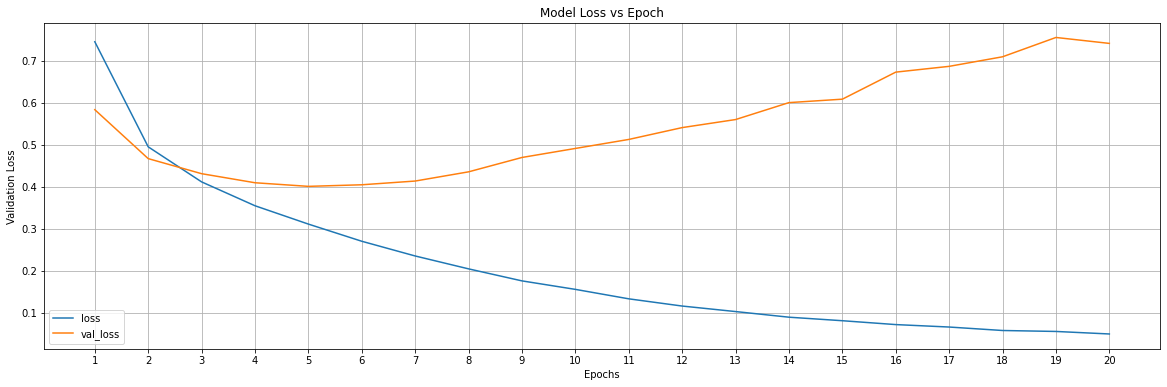

In [ ]:
# use seaborn to plot loss and accuracy metrics

# YOUR CODE HERE
plot_cols = ['loss', 'val_loss']
adam_df[plot_cols].plot(figsize=(20,6), grid=True);
plt.title('Model Loss vs Epoch');
plt.xlabel('Epochs');
plt.ylabel('Validation Loss');
plt.xticks(df.index);

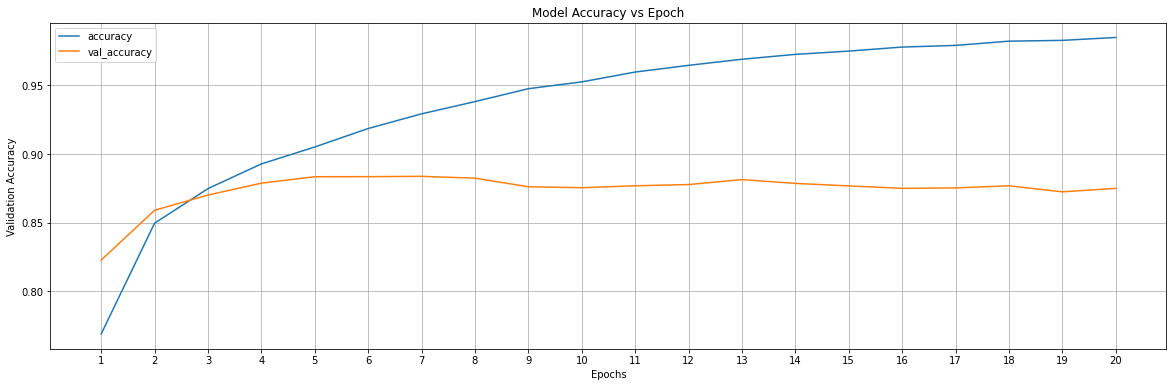

In [ ]:
plot_cols = ['accuracy', 'val_accuracy']
adam_df[plot_cols].plot(figsize=(20,6), grid=True);
plt.title('Model Accuracy vs Epoch');
plt.xlabel('Epochs');
plt.ylabel('Validation Accuracy');
plt.xticks(df.index);

In [ ]:
# a check that we're using the correct optimizer in this model
opt_name = model.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

### Observations 

This plot should look very different from the previous plot. Based on the plot of the training and validation loss, answer the following questions. 

**Is our model overfitting? Why or why not?**

YOUR ANSWER HERE

Yes, this model is overfitting. This is evident by the huge gap between the training and validation loss curve, as well as the gap between the training and validation accuracy curve. As the number of epochs increases beyond 3, the gap steadily increases. There is also a plateau of the validation accuracy while the training accuracy continues to improve, indicating that the model may not be able to generalize well to new data.

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

YOUR ANSWER HERE

No, since the model is already overfitting, increasing the number of epochs beyond 20 may only exacerbate the problem. It would cause the loss to increase and the overfitting to increase as well.

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

YOUR ANSWER HERE

To help prevent or mitigate overfitting in the model we could cut off the training at about 3 epoch were the validation loss is actually lower than the lowest loss in our previous model and where the model has essentially no overfitting as indicated in the overlap in the training and loss curves.